In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
#Extra Purpose
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv')

In [ ]:
news_dataset.shape

(72134, 4)

In [ ]:
# print the first 5 rows of the dataframe
news_dataset.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()

Unnamed: 0      0
title         558
text           39
label           0
dtype: int64

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')

In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']

In [ ]:
print(X)
print(Y)

       Unnamed: 0                                              title  \
0               0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1               1                                                      
2               2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3               3  Bobby Jindal, raised Hindu, uses story of Chri...   
4               4  SATAN 2: Russia unvelis an image of its terrif...   
...           ...                                                ...   
72129       72129  Russians steal research on Trump in hack of U....   
72130       72130   WATCH: Giuliani Demands That Democrats Apolog...   
72131       72131  Migrants Refuse To Leave Train At Refugee Camp...   
72132       72132  Trump tussle gives unpopular Mexican leader mu...   
72133       72133  Goldman Sachs Endorses Hillary Clinton For Pre...   

                                                    text  
0      No comment is expected from Barack Obama Membe...  
1         Did the

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(title):
    stemmed_title = re.sub('[^a-zA-Z]',' ',title)
    stemmed_title = stemmed_title.lower()
    stemmed_title = stemmed_title.split()
    stemmed_title = [port_stem.stem(word) for word in stemmed_title if not word in stopwords.words('english')]
    stemmed_title = ' '.join(stemmed_title)
    return stemmed_title

In [ ]:
news_dataset['title'] = news_dataset['title'].apply(stemming)

In [ ]:
print(news_dataset['title'])

0        law enforc high alert follow threat cop white ...
1                                                         
2        unbeliev obama attorney gener say charlott rio...
3        bobbi jindal rais hindu use stori christian co...
4        satan russia unv imag terrifi new supernuk wes...
                               ...                        
72129    russian steal research trump hack u democrat p...
72130    watch giuliani demand democrat apolog trump ra...
72131         migrant refus leav train refuge camp hungari
72132    trump tussl give unpopular mexican leader much...
72133           goldman sach endors hillari clinton presid
Name: title, Length: 72134, dtype: object


In [ ]:
#separating the data and label
X = news_dataset['title'].values
Y = news_dataset['label'].values

In [ ]:
print(X)

['law enforc high alert follow threat cop white blacklivesmatt fyf terrorist video'
 ''
 'unbeliev obama attorney gener say charlott rioter peac protest home state north carolina video'
 ... 'migrant refus leav train refuge camp hungari'
 'trump tussl give unpopular mexican leader much need shot arm'
 'goldman sach endors hillari clinton presid']


In [ ]:
print(Y)

[1 1 1 ... 0 0 1]


In [ ]:
Y.shape

(72134,)

In [ ]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)

In [ ]:
print(X)

  (0, 19106)	0.19134939529376566
  (0, 18648)	0.1297506867782943
  (0, 17363)	0.2542650376115143
  (0, 17260)	0.24871262252022117
  (0, 9699)	0.22829788917209384
  (0, 7887)	0.26746434949988324
  (0, 6730)	0.48553136502134386
  (0, 6425)	0.28932771754845743
  (0, 5509)	0.31820565801047196
  (0, 3679)	0.24871262252022117
  (0, 1802)	0.33473541566384035
  (0, 407)	0.3190180925014663
  (2, 18648)	0.13443733492985524
  (2, 18034)	0.35962437110547785
  (2, 16446)	0.1999703023632961
  (2, 15094)	0.1609967301122813
  (2, 14591)	0.3580030298678158
  (2, 13591)	0.22687620695463123
  (2, 12744)	0.27904818164471595
  (2, 12011)	0.16878852994653004
  (2, 11864)	0.2231406266784195
  (2, 8020)	0.2692285294185893
  (2, 6880)	0.2652283770602196
  (2, 2919)	0.3639616996972358
  (2, 2673)	0.30809679188606154
  :	:
  (72130, 1768)	0.49293214478810593
  (72130, 764)	0.39870380407772993
  (72131, 17617)	0.39738745004026604
  (72131, 14186)	0.3534104623564766
  (72131, 14182)	0.32391500471431983
  (72131, 1

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)

##1.Logistic Regression

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression()

In [ ]:
# Accuracy Score Using Logistic Regression
model = model.fit(X_train, Y_train)
lr_pred = model.predict(X_test)

print("Accuracy of Logistic Regression Classifier: {}%".format(round(accuracy_score(Y_test, lr_pred)*100,2)))

Accuracy of Logistic Regression Classifier: 90.06%


In [ ]:
# Accuracy score on the Training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.9199403885143916


In [ ]:
# Accuracy score on the Test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.900603035974215


In [ ]:
#The training-set accuracy score is 0.92
#while the test-set accuracy to be 0.90. 
#These two values are quite comparable. So, there is no question of overfitting.

In [ ]:

null_accuracy = (/(+))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

cm = confusion_matrix(Y_test, lr_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6216  790]
 [ 644 6777]]

True Positives(TP) =  6216

True Negatives(TN) =  6777

False Positives(FP) =  790

False Negatives(FN) =  644


In [ ]:
#The confusion matrix shows 6216 + 6777 = 12993 correct predictions and 644 + 790 = 1434 incorrect predictions.

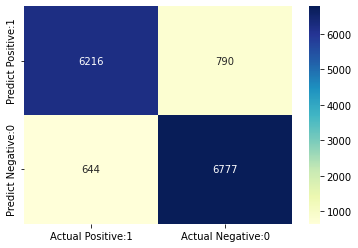

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Classification Report
#It displays the precision, recall, f1 and support scores for the model.

In [ ]:
print(classification_report(Y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7006
           1       0.90      0.91      0.90      7421

    accuracy                           0.90     14427
   macro avg       0.90      0.90      0.90     14427
weighted avg       0.90      0.90      0.90     14427



In [ ]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9006


In [ ]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.0994


In [ ]:
#Precision
#Precision identifies the proportion of correctly predicted positive outcome. It is more concerned with the positive class than the negative class.

In [ ]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8872


In [ ]:
#Recall
#Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positive outcomes. 
#It can be given as the ratio of true positives (TP) to the sum of true positives and false negatives (TP + FN). Recall is also called Sensitivity.

In [ ]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9061


In [ ]:
#True Positive Rate  (True Positive Rate is synonymous with Recall.)

In [ ]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.9061


In [ ]:
#False Positive Rate

In [ ]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 0.1044


In [ ]:
#Specificity

In [ ]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.8956


In [ ]:
#Receiver Operating Characteristic (ROC) Curves
#The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

#True Positive Rate (TPR) is also called Recall. It is defined as the ratio of TP to (TP + FN).

#False Positive Rate (FPR) is defined as the ratio of FP to (FP + TN).

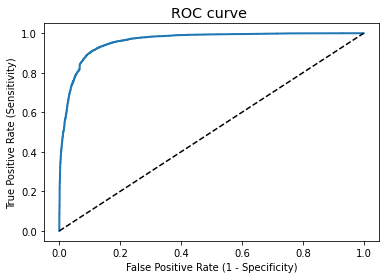

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve
Y_pred1 = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(Y_test, Y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve ')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [ ]:
#ROC-AUC (ROC AUC is the percentage of the ROC plot that is underneath the curve)

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
y_pred1 = model.predict_proba(X_test)[:, 1]
ROC_AUC = roc_auc_score(Y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9599


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(model, X_train, Y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9571


In [ ]:
#k-Fold Cross Validation

In [ ]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X_train, Y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.892393   0.8954254  0.8913439  0.90139503 0.89749588]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8956


In [ ]:
#Our, original model score is found to be 0.0.9199. 
#The average cross-validation score is 0.8956. 
#So, we can conclude that cross-validation does not result in performance improvement.

##2.Support Vector Machines Classifier

In [ ]:
#Support Vector classification

In [ ]:
# instantiate classifier 
svc=SVC()

In [ ]:
# fit classifier to training set
svc.fit(X_train,Y_train)

SVC()

In [ ]:
# make predictions on test set
Y_pred=svc.predict(X_test)

In [ ]:
# compute and print accuracy score
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)*100))

Model accuracy score : 91.6892


In [ ]:
# compute and print accuracy score in %
print("Accuracy of SVM : {}%".format(round(accuracy_score(Y_test, Y_pred)*100,2)))

Accuracy of SVM : 91.69%


In [ ]:
#Here, Y_test are the true class labels and Y_pred are the predicted class labels in the test-set.

In [ ]:
#Compare the train-set and test-set accuracy

In [ ]:
Y_pred_train = svc.predict(X_train)

In [ ]:
#Print the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[6336  670]
 [ 529 6892]]

True Positives(TP) =  6336

True Negatives(TN) =  6892

False Positives(FP) =  670

False Negatives(FN) =  529


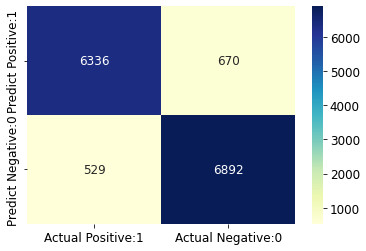

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print("\nClassification Report of SVM Classifier:\n")
print(classification_report(Y_test, Y_pred))


Classification Report of SVM Classifier:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7006
           1       0.91      0.93      0.92      7421

    accuracy                           0.92     14427
   macro avg       0.92      0.92      0.92     14427
weighted avg       0.92      0.92      0.92     14427



In [ ]:
#Classification accuracy
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [ ]:
# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9169
Classification error : 0.0831
Precision : 0.9044
Recall or Sensitivity : 0.9229
True Positive Rate : 0.9229
False Positive Rate : 0.0886
Specificity : 0.9114


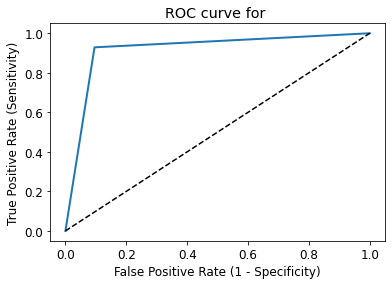

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(Y_test, Y_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9165


In [ ]:
#Classification
svc_f1 = round(f1_score(Y_test, Y_pred, average='weighted'), 3)
svc_accuracy = round((accuracy_score(Y_test, Y_pred)*100), 2)

print("Accuracy : " , svc_accuracy , " %")
print("f1_score : " , svc_f1)

##3.Naive-Bayes Classification

In [ ]:
#Naive-Bayes classification

In [ ]:
# instantiate the Naive Bayes Model
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
Y_pred = mnb.predict(X_test)

In [ ]:
#Check Accuracy score Using Naive Bayes 
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred)))

Model accuracy score: 0.8797


In [ ]:
#Check Accuracy score Using Naive Bayes
model_nb = mnb.fit(X_train, Y_train)
nb_pred = model_nb.predict(X_test)

print("Accuracy of Naive Bayes Classifier: {}%".format(round(accuracy_score(Y_test, nb_pred)*100,2)))

#Here, Y_test are the true class labels and nb_pred are the predicted class labels in the test-set.

Accuracy of Naive Bayes Classifier: 87.97%


In [ ]:
#Compare the train-set and test-set accuracy
Y_pred_train = mnb.predict(X_train)

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, Y_pred_train)))

Training-set accuracy score: 0.8958


In [ ]:
# Compare the scores on training and test set

print('Training set score: {:.4f}'.format(mnb.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(mnb.score(X_test, Y_test)))

Training set score: 0.8958
Test set score: 0.8797


In [ ]:
#The training-set accuracy score is 0.8958 
#while the test-set accuracy to be 0.8797. 
#These two values are quite comparable. So, there is no sign of overfitting.

In [ ]:
#Confusion Matrix
print("\nConfusion Matrix of Naive Bayes Classifier:\n")
print(confusion_matrix(Y_test, nb_pred))
print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])


Confusion Matrix of Naive Bayes Classifier:

[[6076  930]
 [ 805 6616]]

True Positives(TP) =  6216

True Negatives(TN) =  6777

False Positives(FP) =  790

False Negatives(FN) =  644


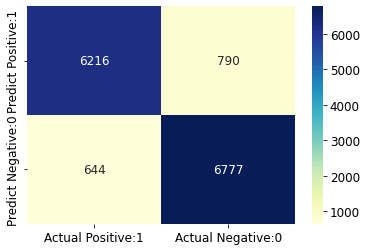

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
#Classification Report
print("\nClassification Report of Naive Bayes Classifier:\n")
print(classification_report(Y_test, nb_pred))


Classification Report of Naive Bayes Classifier:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7006
           1       0.88      0.89      0.88      7421

    accuracy                           0.88     14427
   macro avg       0.88      0.88      0.88     14427
weighted avg       0.88      0.88      0.88     14427



In [ ]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# print classification accuracy
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

# print classification error
classification_error = (FP + FN) / float(TP + TN + FP + FN)
print('Classification error : {0:0.4f}'.format(classification_error))

# print precision score
precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

#Recall
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

#True_Positive_Rate
true_positive_rate = TP / float(TP + FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

#False_Positive_Rate
false_positive_rate = FP / float(FP + TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

#Specificity
specificity = TN / (TN + FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy : 0.9006
Classification error : 0.0994
Precision : 0.8872
Recall or Sensitivity : 0.9061
True Positive Rate : 0.9061
False Positive Rate : 0.1044
Specificity : 0.8956


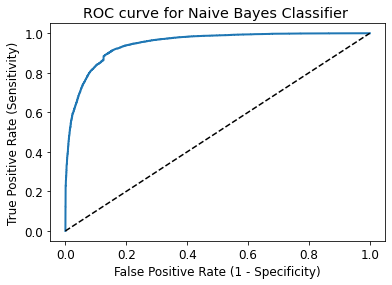

In [ ]:
# plot ROC Curve

from sklearn.metrics import roc_curve
y_pred1 = mnb.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Naive Bayes Classifier ')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

Text(0, 0.5, 'Frequency')

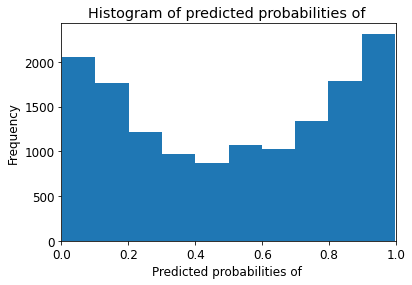

In [ ]:
# plot histogram of predicted probabilities
# adjust the font size 
plt.rcParams['font.size'] = 12
# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)
# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of ')
# set the x-axis limit
plt.xlim(0,1)
# set the title
plt.xlabel('Predicted probabilities of ')
plt.ylabel('Frequency')

In [ ]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(Y_test, nb_pred)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8794


In [ ]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score
Cross_validated_ROC_AUC = cross_val_score(mnb, X_train, Y_train, cv=5, scoring='roc_auc').mean()
print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.9425


In [ ]:
#k-Fold Cross Validation 

# Applying 10-Fold Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(mnb, X_train, Y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.86709409 0.86882689 0.86830705 0.87298562 0.86865361 0.87801074
 0.8714261  0.87729636 0.87712305 0.86863085]


In [ ]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8718


In [ ]:
# Model evaluation

print(classification_report(Y_test, nb_pred))
print(confusion_matrix(Y_test, nb_pred))

MNB_f1 = round(f1_score(Y_test, nb_pred, average='weighted'), 3)
MNB_accuracy = round((accuracy_score(Y_test, nb_pred)*100),2)

print("Accuracy : " , MNB_accuracy , " %")
print("f1_score : " , MNB_f1)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7006
           1       0.88      0.89      0.88      7421

    accuracy                           0.88     14427
   macro avg       0.88      0.88      0.88     14427
weighted avg       0.88      0.88      0.88     14427

[[6076  930]
 [ 805 6616]]
Accuracy :  87.97  %
f1_score :  0.88


##4.Neural Network (LSTM)

In [ ]:
import pandas as pd
import numpy as np
import nltk, keras, string, re, html, math

from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter, defaultdict
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Loads the IMDB dataset. We load it using pandas as dataframe
data = pd.read_csv('/content/drive/MyDrive/WELFake_Dataset.csv') 
print("Data shape - ", data.shape, "\n")                                  #prints the number of rows and columns

for col in data.columns:
    print("The number of null values - ", col, data[col].isnull().sum())   
#prints the number of null values in each column

data["review"]= data["title"].str.lower()     #converts every value in the column to lowercase
data.head()

Data shape -  (72134, 4) 

The number of null values -  Unnamed: 0 0
The number of null values -  title 558
The number of null values -  text 39
The number of null values -  label 0


,Unnamed: 0,title,text,label,review
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement on high alert following threat...
1,1,NaN,Did they post their votes for Hillary already?,1,NaN
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable! obama’s attorney general says mo...
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"bobby jindal, raised hindu, uses story of chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan 2: russia unvelis an image of its terrif...


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def cleaning(data):
    clean = re.sub('<.*?>', ' ', str(data))            
#removes HTML tags
    clean = re.sub('\'.*?\s',' ', clean)               
#removes all hanging letters afer apostrophes (s in it's)
    clean = re.sub(r'http\S+',' ', clean)              
#removes URLs
    clean = re.sub('\W+',' ', clean)                   
#replacing the non alphanumeric characters
    return html.unescape(clean)
data['cleaned'] = data['review'].apply(cleaning)


def tokenizing(data):
    review = data['cleaned']                            
#tokenizing is done
    tokens = nltk.word_tokenize(review)
    return tokens
data['tokens'] = data.apply(tokenizing, axis=1)


stop_words = set(stopwords.words('english'))
def remove_stops(data):
    my_list = data['tokens']
    meaningful_words = [w for w in my_list if not w in stop_words]           #stopwords are removed from the tokenized data
    return (meaningful_words)
data['tokens'] = data.apply(remove_stops, axis=1)


lemmatizer = WordNetLemmatizer()
def lemmatizing(data):
    my_list = data['tokens']
    lemmatized_list = [lemmatizer.lemmatize(word) for word in my_list]    
#lemmatizing is performed. It's more efficient than stemming.
    return (lemmatized_list)
data['tokens'] = data.apply(lemmatizing, axis=1)

def rejoin_words(data):
    my_list = data['tokens']
    joined_words = ( " ".join(my_list))                     
#rejoins all stemmed words
    return joined_words
data['cleaned'] = data.apply(rejoin_words, axis=1)

data.head()

,Unnamed: 0,title,text,label,review,cleaned,tokens
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,law enforcement on high alert following threat...,law enforcement high alert following threat co...,"[law, enforcement, high, alert, following, thr..."
1,1,NaN,Did they post their votes for Hillary already?,1,NaN,nan,[nan]
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,unbelievable! obama’s attorney general says mo...,unbelievable obama attorney general say charlo...,"[unbelievable, obama, attorney, general, say, ..."
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,"bobby jindal, raised hindu, uses story of chri...",bobby jindal raised hindu us story christian c...,"[bobby, jindal, raised, hindu, us, story, chri..."
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,satan 2: russia unvelis an image of its terrif...,satan 2 russia unvelis image terrifying new su...,"[satan, 2, russia, unvelis, image, terrifying,..."


In [ ]:
# Prints statistics of Data like avg length of sentence , proportion of data w.r.t class labels
def sents(data):
    clean = re.sub('<.*?>', ' ', str(data))            
#removes HTML tags
    clean = re.sub('\'.*?\s',' ', clean)               
#removes all hanging letters afer apostrophes (s in it's)
    clean = re.sub(r'http\S+',' ', clean)              
#removes URLs
    clean = re.sub('[^a-zA-Z0-9\.]+',' ', clean)       
#removes all non-alphanumeric characters except periods.
    tokens = nltk.sent_tokenize(clean)                 
#sentence tokenizing is done
    return tokens
sents = data['review'].apply(sents)

length_s = 0
for i in range(data.shape[0]):
    length_s+= len(sents[i])
print("The number of sentences is - ", length_s)          
#prints the number of sentences

length_t = 0
for i in range(data.shape[0]):
    length_t+= len(data['tokens'][i])
print("\nThe number of tokens is - ", length_t)           
#prints the number of tokens

average_tokens = round(length_t/length_s)
print("\nThe average number of tokens per sentence is - ", average_tokens) 
#prints the average number of tokens per sentence

The number of sentences is -  73419

The number of tokens is -  656398

The average number of tokens per sentence is -  9


In [ ]:
# gets reviews column from df
reviews = data['cleaned'].values

# gets labels column from df
labels = data['label'].values
# Uses label encoder to encode labels. Convert to 0/1
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)
data['encoded']= encoded_labels
print(data['encoded'].head())

# prints(enc.classes_)
encoder_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("\nThe encoded classes are - ", encoder_mapping)

labels = data['encoded']

0    1
1    1
2    1
3    0
4    1
Name: encoded, dtype: int64

The encoded classes are -  {0: 0, 1: 1}


In [ ]:
# Splits the data into train and test (80% - 20%). 
# Uses stratify in train_test_split so that both train and test have similar ratio of positive and negative samples.
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, labels, test_size=0.2, random_state=42, stratify=labels)

In [ ]:
# Uses Count vectorizer to get frequency of the words
vectorizer = CountVectorizer(max_features = 3000)

sents_encoded = vectorizer.fit_transform(train_sentences)         #encodes all training sentences
counts = sents_encoded.sum(axis=0).A1
vocab = list(vectorizer.get_feature_names())

In [ ]:
# Hyperparameters of the model
oov_tok = '<OOK>'
embedding_dim = 100
max_length = 150
padding_type='post'
trunc_type='post'

# tokenizes sentences
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_sentences)

# vocabulary size
word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 1

# converts train dataset to sequence and pads sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

# converts Test dataset to sequence and pads sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compiles model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 150, 100)          2526900   
                                                                 
 bidirectional (Bidirectiona  (None, 128)              84480     
 l)                                                              
                                                                 
 dense_2 (Dense)             (None, 24)                3096      
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,614,501
Trainable params: 2,614,501
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#training the model
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
1623/1623 [==============================] - 296s 179ms/step - loss: 0.2634 - accuracy: 0.8851 - val_loss: 0.2246 - val_accuracy: 0.9087
Epoch 2/5
1623/1623 [==============================] - 285s 175ms/step - loss: 0.1418 - accuracy: 0.9452 - val_loss: 0.2164 - val_accuracy: 0.9130
Epoch 3/5
1623/1623 [==============================] - 287s 177ms/step - loss: 0.0877 - accuracy: 0.9666 - val_loss: 0.2588 - val_accuracy: 0.9037
Epoch 4/5
1623/1623 [==============================] - 286s 176ms/step - loss: 0.0542 - accuracy: 0.9799 - val_loss: 0.3188 - val_accuracy: 0.9045
Epoch 5/5
1623/1623 [==============================] - 288s 177ms/step - loss: 0.0355 - accuracy: 0.9873 - val_loss: 0.3926 - val_accuracy: 0.9063


In [ ]:
# Gets probabilities
prediction = model.predict(test_padded)
print("The probabilities are - ", prediction, sep='\n')

# Gets labels based on probability 1 if p>= 0.5 else 0
for each in prediction:
    if each[0] >=0.5:
        each[0] = 1
    else:
        each[0] = 0
prediction = prediction.astype('int32') 
print("\nThe labels are - ", prediction, sep='\n')

# Calculates accuracy on Test data
print("\nThe accuracy of the model is ", accuracy_score(test_labels, prediction))
print("\nThe accuracy and other metrics are \n", classification_report(test_labels, prediction, labels=[0, 1]),sep='\n')

The probabilities are - 
[[9.9999237e-01]
 [5.7440996e-03]
 [4.7819995e-05]
 ...
 [9.8428690e-01]
 [7.0668888e-01]
 [2.4565935e-02]]

The labels are - 
[[1]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]

The accuracy of the model is  0.9055936785194427

The accuracy and other metrics are 

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7006
           1       0.90      0.91      0.91      7421

    accuracy                           0.91     14427
   macro avg       0.91      0.91      0.91     14427
weighted avg       0.91      0.91      0.91     14427

